In [47]:
import pandas as pd

In [48]:
df = pd.read_excel("data/서울특별시_고립은둔 청년 실태조사 결과_20221231/★DATA_서울시 고립은둔청년 실태조사(청년조사)_v1_230127.xlsx")

In [49]:
df['KEY_1'] = df['KEY_1'].replace(2, 0)

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

independent_vars = ['SQ6_R', 'A1', 'A7', 'A9', 'A13_1', 'A13_2', 'A13_3', 'A13_4', 'A15', 'A17', 
                    'A18_1', 'A18_2', 'A18_3', 'A18_4', 'A19_1', 'A19_2', 'A19_3', 'A19_4', 'A19_5', 'A19_6', 
                    'A20_1', 'A20_2', 'A20_3', 'A20_4', 'A20_5', 'A20_6', 'A20_7', 'A20_8', 
                    'B1_1', 'B1_2', 'B1_3', 'B1_4', 'B1_5', 'B5_1', 'B7', 'B8', 'B9_1', 'B9_2', 'B9_3', 'B9_4', 
                    'B10', 'B11', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B12_8', 'B12_9', 
                    'DQ1', 'DQ5', 'DQ6']

X = df[independent_vars]
y = df['KEY_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[988  26]
 [ 33  56]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1014
           1       0.68      0.63      0.65        89

    accuracy                           0.95      1103
   macro avg       0.83      0.80      0.81      1103
weighted avg       0.94      0.95      0.95      1103



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
import pandas as pd
import statsmodels.api as sm


# 회귀 모델 학습
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

# 회귀 계수 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.130408
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  KEY_1   No. Observations:                 5513
Model:                          Logit   Df Residuals:                     5458
Method:                           MLE   Df Model:                           54
Date:                Sat, 20 Jan 2024   Pseudo R-squ.:                  0.5628
Time:                        16:06:47   Log-Likelihood:                -718.94
converged:                       True   LL-Null:                       -1644.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4938      1.230     -0.402      0.688      -2.904       1.917
SQ6_R         -0.0971      0.

In [52]:
# 유의미한 변수들 중 회귀계수의 절대값이 큰순서대로 내림차순
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': result.params, 'P-Value': result.pvalues})
significant_vars = coef_df[coef_df['P-Value'] < 0.05]
significant_vars = significant_vars.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)
print(significant_vars)

      Variable  Coefficient       P-Value
A13_3    A13_3    -1.030367  5.781838e-48
A1          A1     0.890491  9.102239e-18
A18_2    A18_2     0.565218  1.487141e-06
A20_5    A20_5     0.456466  2.725326e-02
A13_4    A13_4    -0.448395  5.346998e-17
B11        B11    -0.441881  4.402659e-02
A19_1    A19_1     0.436193  6.528357e-03
B12_1    B12_1     0.254417  4.805603e-02
B7          B7     0.206656  4.183871e-02
A13_2    A13_2    -0.176911  1.602722e-02
DQ6        DQ6     0.162829  2.729059e-02
DQ1        DQ1    -0.112115  2.001938e-02
A7          A7     0.101902  1.689910e-02


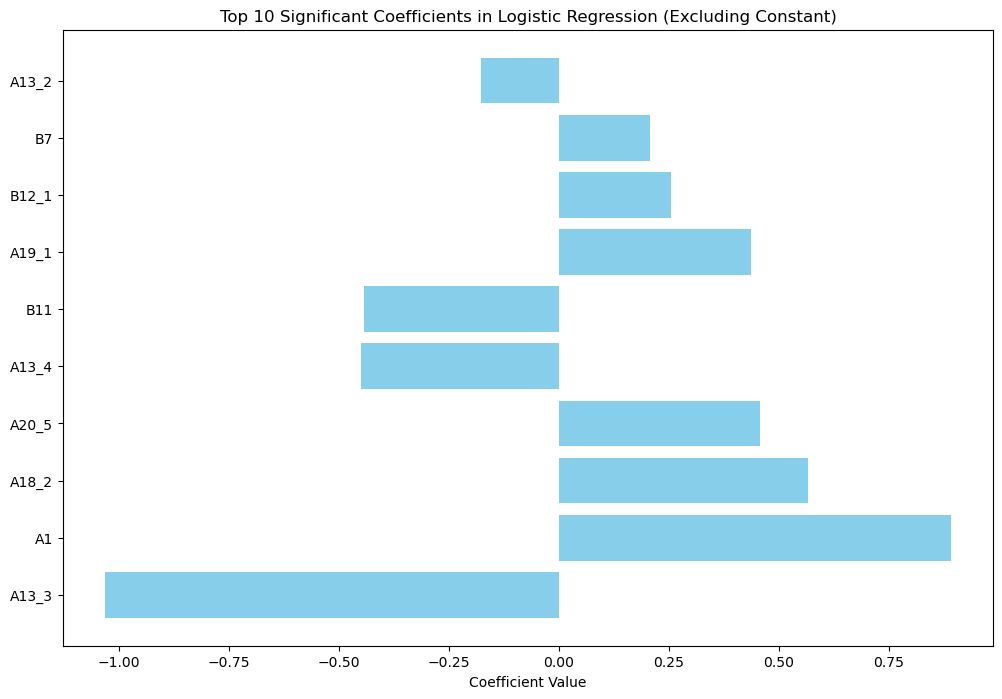

In [53]:
import matplotlib.pyplot as plt
# 상수를 제외한 상위 10개 변수 선택
top_10_vars_without_const = significant_vars[significant_vars['Variable'] != 'const'].head(10)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
plt.barh(top_10_vars_without_const['Variable'], top_10_vars_without_const['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Significant Coefficients in Logistic Regression (Excluding Constant)')
plt.show()

# -----------------------------------------------------------

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#유의한 변수들만 재구성
significant_vars = ['SQ6_R', 'A1', 'A7', 'A9', 'A13_1', 'A13_2', 'A13_3', 'A13_4', 'A15', 'A20_1', 'A20_5', 
                    'B7', 'B11', 'DQ1', 'DQ5', 'DQ6']

X = df[significant_vars]
y = df['KEY_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[991  23]
 [ 34  55]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1014
           1       0.71      0.62      0.66        89

    accuracy                           0.95      1103
   macro avg       0.84      0.80      0.82      1103
weighted avg       0.95      0.95      0.95      1103



In [55]:
import pandas as pd
import statsmodels.api as sm


X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.145374
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  KEY_1   No. Observations:                 5513
Model:                          Logit   Df Residuals:                     5496
Method:                           MLE   Df Model:                           16
Date:                Sat, 20 Jan 2024   Pseudo R-squ.:                  0.5126
Time:                        16:06:47   Log-Likelihood:                -801.45
converged:                       True   LL-Null:                       -1644.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0568      0.841      4.823      0.000       2.408       5.705
SQ6_R         -0.0454      0.

In [56]:
# 유의미한 변수들 중 회귀계수의 절대값이 큰순서대로 내림차순
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': result.params, 'P-Value': result.pvalues})
significant_vars = coef_df[coef_df['P-Value'] < 0.05]
significant_vars = significant_vars.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=True)
print(significant_vars)

      Variable  Coefficient       P-Value
A7          A7     0.099428  9.597993e-03
DQ1        DQ1    -0.147573  9.904568e-04
DQ6        DQ6     0.212433  1.839362e-03
B7          B7     0.277734  2.757442e-03
A13_2    A13_2    -0.292234  1.935480e-05
A13_4    A13_4    -0.471850  4.440942e-20
A9          A9    -0.484080  1.639582e-03
A15        A15    -0.657857  4.319576e-06
A20_5    A20_5     0.662775  6.858026e-06
B11        B11    -0.724193  1.916405e-04
A1          A1     0.791378  3.013166e-17
A13_3    A13_3    -1.026848  2.038509e-55
const    const     4.056810  1.412735e-06


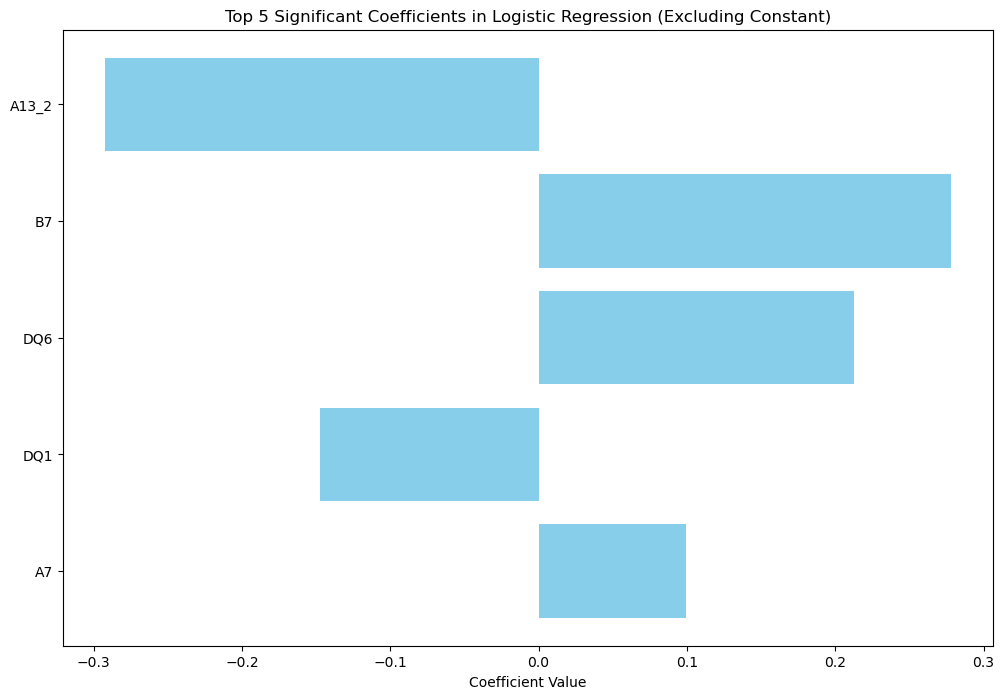

In [58]:
import matplotlib.pyplot as plt
# 상수를 제외한 상위 10개 변수 선택
top_10_vars_without_const = significant_vars[significant_vars['Variable'] != 'const'].head(5)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
plt.barh(top_10_vars_without_const['Variable'], top_10_vars_without_const['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 5 Significant Coefficients in Logistic Regression (Excluding Constant)')
plt.show()